In [1]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('onedork')

In [2]:
# EDA
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd
from matplotlib.animation import FuncAnimation


1. `df  = pd.read_csv("electronics.csv")`: This reads a CSV file named "electronics.csv" 
    and stores it in a pandas DataFrame called `df`.

2. `df.dropna(axis=0, how="any", inplace=True)`: This drops any rows from `df` that have missing values (NaN) 
    along the rows (axis=0). The parameter `how="any"` specifies that if any NaN value is present in a row, 
    that entire row will be dropped. The parameter `inplace=True` specifies that the changes will be made to
    `df` in-place (i.e., it modifies the original DataFrame `df` instead of creating a new copy).

3. `df.reset_index(inplace=True)`: This resets the index of `df` and saves the changes in-place (i.e., it modifies 
    the original DataFrame `df` instead of creating a new copy). The `reset_index` method creates a new column called
    `index` that contains the new index values for the DataFrame.

4. `df[df["year"]==2000]["brand"].value_counts()[:10]`: This filters the rows of `df` to only include those where 
    the value in the `year` column is equal to 2000. It then selects the `brand` column from the filtered DataFrame, 
    and applies the `value_counts()` method to count the occurrences of each unique value in the `brand` column. 
    The `[:10]` at the end of the line specifies that only the top 10 most frequently occurring values should be
    returned. The resulting output is a pandas Series object that contains the counts of the top 10 most 
    frequently occurring brands in the year 2000.

In [3]:
df = pd.read_csv("electronics_1.csv")


        This code creates a live bar plot using the `FuncAnimation` function from the `matplotlib.animation`
        module. The plot shows the top 10 sales companies for a particular year,
        with the year increasing by one every second until it reaches the final year. 
        The data is taken from a Pandas dataframe called `df` that has columns for year and brand.

        Here is a breakdown of the code:

        - `%matplotlib notebook` is a magic command used to display interactive plots in Jupyter notebooks.
        - `import time` imports the Python `time` module, 
        which is used to add a delay of 2 seconds when the animation reaches the final year before starting 
        over again from the initial year.
        - `initial_year = 2000` and `final_year = 2018` set the range of years to display.
        - `fig, ax = plt.subplots()` creates a new figure and axis object for the plot.
        - `def update(frame)` is the function that updates the plot for each frame of the animation. 
        
        The `frame` parameter is not used in this code, but it is required by the `FuncAnimation` function.
        - `global initial_year, final_year` allows the `initial_year` and `final_year` variables to be modified
        inside the `update` function.
        - `if initial_year > final_year:` checks if the animation has reached the final year, and if so,
        resets the `initial_year` variable to start over again.
        - `ax.clear()` clears the axis object for each frame.
        - `ax.set_title(f"Top Sales Company's of year {initial_year}", color="salmon", fontsize=15)` 
        
        sets the title of the plot to show the current year.
        - `data = df[df["year"]==initial_year]["brand"].value_counts()[:10]` selects the top 10 sales companies 
        for the current year and stores the data in a Pandas Series object called `data`.
        - `colors = ['skyblue', 'pink', 'orange', 'lightgreen', 'gold', 'mediumturquoise', 'plum',
        'darksalmon', 'lightcoral', 'mediumspringgreen']` creates a list of colors to use for the bars in the plot.
        - `bars = ax.barh(data.index, data.values, color=colors)` creates the horizontal bar chart using the `barh` 
        method of the axis object. The `data.index` and `data.values` are used to specify the x and y values of the bars,
        respectively. The `color` parameter is set to the list of colors created earlier.
        - `for bar in bars:` loops through each bar in the chart.
        - `width = bar.get_width()` gets the width of the current bar.
        - `ax.annotate(f'{width:.0f}', xy=(width, bar.get_y() + bar.get_height() / 2), xytext=(3, 0), 
        textcoords="offset
        points", va='center')` adds a text annotation to each bar showing the width of the bar. 
        The `f'{width:.0f}'` formats the width as an integer with no decimal places.
        The `xy` parameter specifies the location of the annotation,whichis the right edge of the bar and the middle 
        of the bar height. The `xytext` parameter sets the offset of the text from the annotation location.
        The `textcoords` parameter specifies the coordinate system of the `xy` and `xytext` parameters, 
        which is offset points in this case. The `va` parameter specifies the vertical alignment of the text.
        - `ax.set_xlabel("Number of Sales", fontsize=12)` sets the label for the x-axis.
        - `ax.set_ylabel("Brand", fontsize=12)` sets the label for the

<IPython.core.display.Javascript object>


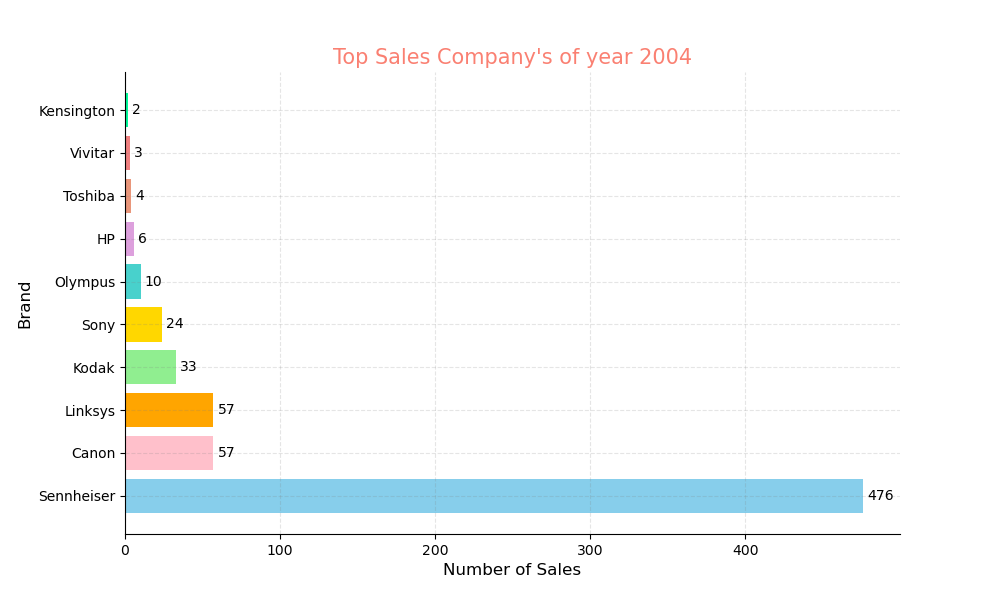

In [4]:
%matplotlib notebook
import time 

initial_year = 2000
final_year = 2018

fig, ax = plt.subplots(figsize=(10, 6))

def update(frame):
    print(frame)
    global initial_year, final_year
    if initial_year > final_year:
        initial_year=2000
        time.sleep(2)
    ax.clear()
    ax.set_title(f"Top Sales Company's of year {initial_year}", color="salmon", fontsize=15)
    data = df[df["year"]==initial_year]["brand"].value_counts()[:10]
    colors = ['skyblue', 'pink', 'orange', 'lightgreen', 'gold', 'mediumturquoise', 'plum', 'darksalmon', 'lightcoral', 'mediumspringgreen']
    bars = ax.barh(data.index, data.values, color=colors)
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{width:.0f}', xy=(width, bar.get_y() + bar.get_height() / 2), 
                    xytext=(3, 0), textcoords="offset points", va='center')
    initial_year += 1
    ax.set_xlabel("Number of Sales", fontsize=12)
    ax.set_ylabel("Brand", fontsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(ls="--", color="gray", alpha=0.2)
    
ani = FuncAnimation(fig, update, interval=1000, cache_frame_data=False)
plt.show()
